In [1]:
import pandas as pd #For dataframe
import numpy as np #Linear Algebra 
import matplotlib.pyplot as plt 
import seaborn as sns

#For data preprocessing 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#For evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Read Dataset 

In [2]:
student_df = pd.read_csv('StudentsPerformance.csv')

In [3]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Data Exploration

In [4]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
student_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
student_df.shape 

(1000, 8)

#### Check for the groups in each column

In [7]:
student_df.gender.unique()

array(['female', 'male'], dtype=object)

In [8]:
student_df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [9]:
student_df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [10]:
student_df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [11]:
student_df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [12]:
student_df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

##### Check for null values

In [13]:
student_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Data Preprocessing

In [14]:
# target is math score 
x = student_df.drop(columns = ['math score'], axis = 1)
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [15]:
y = student_df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

#### Divide columns to numerical and categorical data

In [16]:
numerical_col = x.select_dtypes(exclude = 'object').columns

In [17]:
numerical_col

Index(['reading score', 'writing score'], dtype='object')

In [18]:
categorical_col = x.select_dtypes(include = 'object').columns

In [19]:
categorical_col

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [20]:
scaler =  StandardScaler() # on numerical data
encoder = OneHotEncoder() # data except parental level of education (6 categories)
ordinal_encoder = OrdinalEncoder() #parental level of education

#### Excluding parental level of education from categorial data to apply ordinalencoder on it as it have 6 categories and apply onehotencoder on the rest 

In [21]:
categorical_col = [feature for feature in categorical_col if feature != 'parental level of education']

In [22]:
categorical_col

['gender', 'race/ethnicity', 'lunch', 'test preparation course']

#### rank educatin levels

In [23]:
student_df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [24]:
ordinal_encoder = OrdinalEncoder(categories = [['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree" ]])

#### Apply preprocessing on the data

In [25]:
preprocessing = ColumnTransformer(
    [
        ('OneHotEncoder', encoder, categorical_col),
        ('OrdinalEncoder', ordinal_encoder, ['parental level of education']),
        ('StandardScaler', scaler, numerical_col)
    ]
)


In [26]:
x= preprocessing.fit_transform(x)

In [27]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  4.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  2.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  5.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  2.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  2.        ,
         1.15336989,  1.18158627]])

#### Data splitting

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state= 42)

# Model Training

* Linear regression
* knn regressor
* decsion tree regressor
* random forest regressor
* Xgboost regressor

In [29]:
def evaluate_model(true_data, predicted_data):
    mae = mean_absolute_error(true_data, predicted_data)
    mse = mean_squared_error(true_data, predicted_data)
    rmse = np.sqrt(mean_squared_error(true_data, predicted_data))
    r2_square = r2_score(true_data, predicted_data)
    
    return mae, mse, rmse, r2_square

In [30]:
models = {
    "Linear Regression": LinearRegression(),
    "knn regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGB Regressor" : XGBRegressor()
}

In [31]:
models_list = []
r2_list = []

In [32]:
for i in range(len(list(models))):
    model = list(models.values())[i] # loop on dictionary (models)values
    # Model fit
    model.fit(x_train, y_train)
    
    # Model Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Model evaluation
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    
    print("\n",list(models.keys())[i])
    
    models_list.append(list(models.keys())[i])
    
    print("Model training performance")
    
    print("mean absolute error", train_mae)
    print("mean squared error", train_mse)
    print("root mean squared error", train_rmse)
    print("r2 square", train_r2)
    
    print('------------------------------')
    print("Model testing performance")
    print("mean absolute error", test_mae)
    print("mean squared error", test_mse)
    print("root mean squared error", test_rmse)
    print("r2 square", test_r2)
    
    r2_list.append(test_r2)


 Linear Regression
Model training performance
mean absolute error 4.248659520180561
mean squared error 28.198427765300362
root mean squared error 5.310219182416143
r2 square 0.8736566142040182
------------------------------
Model testing performance
mean absolute error 4.334804989219556
mean squared error 29.983498645952608
root mean squared error 5.4757190072128985
r2 square 0.878127598546635

 knn regressor
Model training performance
mean absolute error 4.525066666666667
mean squared error 32.21136
root mean squared error 5.6755052638509635
r2 square 0.8556766243364382
------------------------------
Model testing performance
mean absolute error 5.6168000000000005
mean squared error 51.04559999999999
root mean squared error 7.1446203538046715
r2 square 0.7925175467650889

 Decision Tree
Model training performance
mean absolute error 0.02
mean squared error 0.08333333333333333
root mean squared error 0.28867513459481287
r2 square 0.9996266240241963
------------------------------
Model

In [33]:
pd.DataFrame(list(zip(models_list, r2_list)), columns = ['model name', 'r2_score']).sort_values(by = ['r2_score'], ascending = False)

,model name,r2_score
0,Linear Regression,0.878128
3,Random Forest Regressor,0.850712
4,XGB Regressor,0.827396
1,knn regressor,0.792518
2,Decision Tree,0.754576


### Linear Regression is the best model

In [34]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Text(0, 0.5, 'predicted')

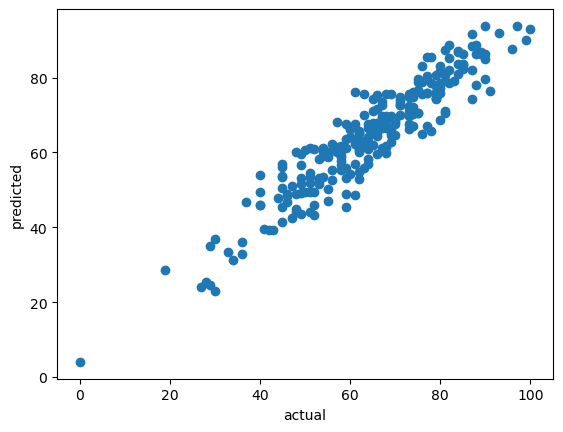

In [35]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')

Text(0, 0.5, 'predicted')

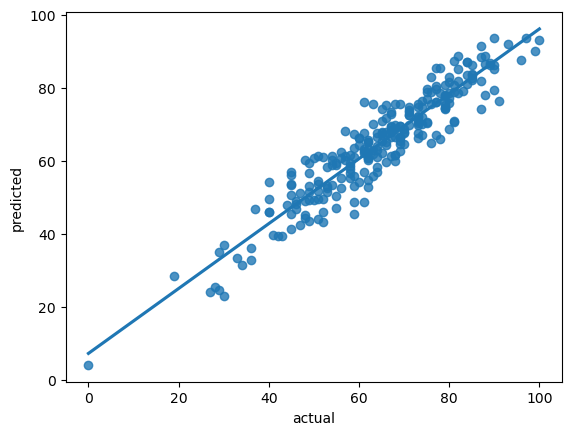

In [37]:
sns.regplot(x = y_test, y = y_pred, ci = None)
plt.xlabel('actual')
plt.ylabel('predicted')

In [39]:
pred_df = pd.DataFrame({'Actual values': y_test,
                        'Predicted Values' : y_pred,
                        'Difference' : y_test - y_pred})

In [40]:
pred_df

,Actual values,Predicted Values,Difference
521,91,76.345218,14.654782
737,53,58.309404,-5.309404
740,80,77.191387,2.808613
660,74,76.277553,-2.277553
411,84,86.947867,-2.947867
...,...,...,...
109,70,64.579860,5.420140
430,64,63.092420,0.907580
77,80,82.964461,-2.964461
84,42,39.271716,2.728284
